In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import sklearn.metrics
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

In [26]:
data20 = pd.read_csv("Models20-22/2020seasonDataforModels")
data21 = pd.read_csv("Models20-22/2021seasonDataforModels")
data22 = pd.read_csv("Models20-22/2022seasonDataforModels")

In [27]:
data20 = data20.drop(["SEASON", "Unnamed: 0"], axis = 1)
data21 = data21.drop(["SEASON", "Unnamed: 0"], axis = 1)
data22 = data22.drop(["SEASON", "Unnamed: 0"], axis = 1)

In [28]:
x20 = data20.drop(["HOME_W"], axis=1)
y20 = data20["HOME_W"]
x21 = data21.drop(["HOME_W"], axis=1)
y21 = data21["HOME_W"]
x22 = data22.drop(["HOME_W"], axis=1)
y22 = data22["HOME_W"]

In [29]:
scaler = StandardScaler()
x20 = pd.DataFrame(scaler.fit_transform(x20.values), columns=x20.columns, index=x20.index)
x21 = pd.DataFrame(scaler.fit_transform(x21.values), columns=x21.columns, index=x21.index)
x22 = pd.DataFrame(scaler.fit_transform(x22.values), columns=x22.columns, index=x22.index)

In [30]:
x_train20, x_test20, y_train20, y_test20 = train_test_split(x20, y20, test_size=0.2, random_state=55)
x_train21, x_test21, y_train21, y_test21 = train_test_split(x21, y21, test_size=0.2, random_state=55)
x_train22, x_test22, y_train22, y_test22 = train_test_split(x22, y22, test_size=0.2, random_state=55)

In [31]:
mlp20 = MLPClassifier()
mlp21 = MLPClassifier()
mlp22 = MLPClassifier()

In [32]:
mlp20.fit(x_train20, y_train20)
mlp21.fit(x_train21, y_train21)
mlp22.fit(x_train22, y_train22)

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [33]:
pred20 = mlp20.predict(x_test20)
pred20_proba = mlp20.predict_proba(x_test20)
pred21 = mlp21.predict(x_test21)
pred21_proba = mlp21.predict_proba(x_test21)
pred22 = mlp22.predict(x_test22)
pred22_proba = mlp22.predict_proba(x_test22)

In [34]:
confusion_matrix_20 = sklearn.metrics.confusion_matrix(y_test20, pred20)
print("Confusion Matrix for 2020 Season: ")
print(confusion_matrix_20)
accuracy_20 = sklearn.metrics.accuracy_score(y_test20, pred20)
print("Accuracy for 2020 Season: ", end="")
print(accuracy_20)
recall_20 = sklearn.metrics.recall_score(y_test20, pred20)
print("Recall for 2020 Season: ", end="")
print(recall_20)
specificity_20 = sklearn.metrics.recall_score(y_test20, pred20, pos_label=0)
print("Specificity for 2020 Season: ", end="")
print(specificity_20)
precision_20 = sklearn.metrics.precision_score(y_test20, pred20)
print("Precision for 2020 Season: ", end="")
print(precision_20)
f1_20 = sklearn.metrics.f1_score(y_test20, pred20)
print("F1 for 2020 Season: ", end="")
print(f1_20)

Confusion Matrix for 2020 Season: 
[[48 43]
 [39 71]]
Accuracy for 2020 Season: 0.5920398009950248
Recall for 2020 Season: 0.6454545454545455
Specificity for 2020 Season: 0.5274725274725275
Precision for 2020 Season: 0.6228070175438597
F1 for 2020 Season: 0.6339285714285714


In [35]:
print("Classification Report for 2020-21 Season:")
print()
print(classification_report(y_test20,pred20)) 

Classification Report for 2020-21 Season:

              precision    recall  f1-score   support

           0       0.55      0.53      0.54        91
           1       0.62      0.65      0.63       110

    accuracy                           0.59       201
   macro avg       0.59      0.59      0.59       201
weighted avg       0.59      0.59      0.59       201



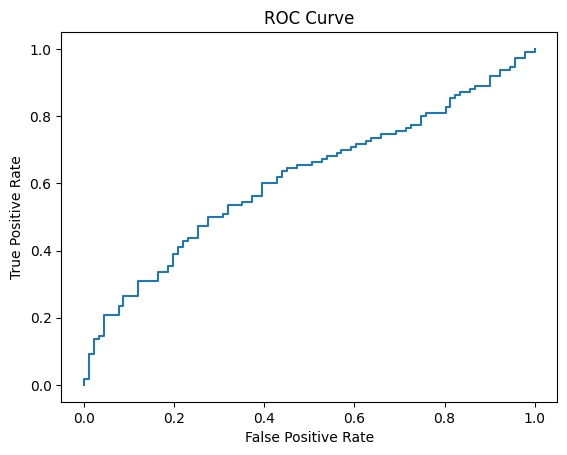

In [36]:
fpr20, tpr20, thresholds20 = roc_curve(y_test20, pred20_proba[:, 1])
plt.plot(fpr20, tpr20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Text(0.5, 1.0, 'Train Precision-Recall curve')

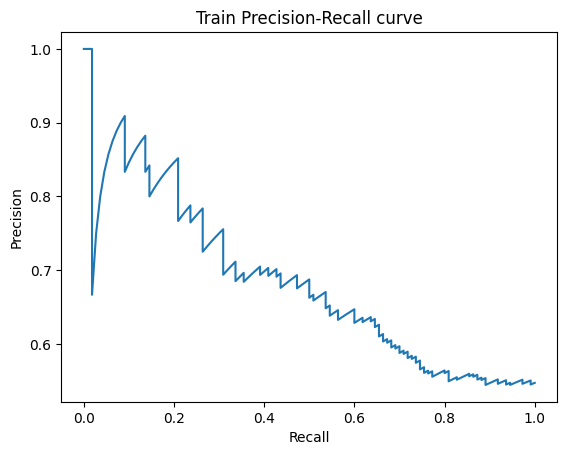

In [37]:
precision20, recall20, thresholdspr20 = precision_recall_curve(y_test20, pred20_proba[:, 1])
plt.plot(recall20, precision20)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve")

In [38]:
confusion_matrix_21 = sklearn.metrics.confusion_matrix(y_test21, pred21)
print("Confusion Matrix for 2021 Season: ")
print(confusion_matrix_21)
accuracy_21 = sklearn.metrics.accuracy_score(y_test21, pred21)
print("Accuracy for 2021 Season: ", end="")
print(accuracy_21)
recall_21 = sklearn.metrics.recall_score(y_test21, pred21)
print("Recall for 2021 Season: ", end="")
print(recall_21)
specificity_21 = sklearn.metrics.recall_score(y_test21, pred21, pos_label=0)
print("Specificity for 2021 Season: ", end="")
print(specificity_21)
precision_21 = sklearn.metrics.precision_score(y_test21, pred21)
print("Precision for 2020 Season: ", end="")
print(precision_21)
f1_21 = sklearn.metrics.f1_score(y_test21, pred21)
print("F1 for 2021 Season: ", end="")
print(f1_21)

Confusion Matrix for 2021 Season: 
[[62 47]
 [43 80]]
Accuracy for 2021 Season: 0.6120689655172413
Recall for 2021 Season: 0.6504065040650406
Specificity for 2021 Season: 0.5688073394495413
Precision for 2020 Season: 0.6299212598425197
F1 for 2021 Season: 0.64


In [39]:
print("Classification Report for 2021-22 Season:")
print()
print(classification_report(y_test21,pred21)) 

Classification Report for 2021-22 Season:

              precision    recall  f1-score   support

           0       0.59      0.57      0.58       109
           1       0.63      0.65      0.64       123

    accuracy                           0.61       232
   macro avg       0.61      0.61      0.61       232
weighted avg       0.61      0.61      0.61       232



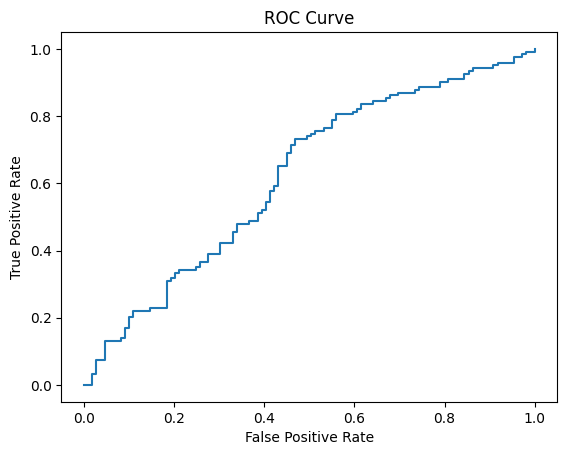

In [40]:
fpr21, tpr21, thresholds21 = roc_curve(y_test21, pred21_proba[:, 1])
plt.plot(fpr21, tpr21)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Text(0.5, 1.0, 'Train Precision-Recall curve')

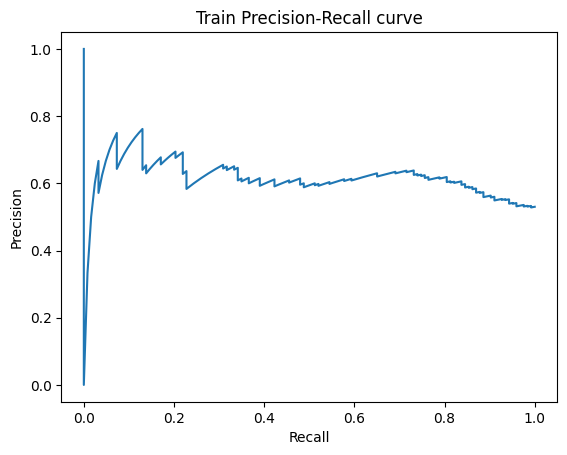

In [41]:
precision21, recall21, thresholdspr21 = precision_recall_curve(y_test21, pred21_proba[:, 1])
plt.plot(recall21, precision21)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve")

In [42]:
confusion_matrix_22 = sklearn.metrics.confusion_matrix(y_test22, pred22)
print("Confusion Matrix for 2022 Season: ")
print(confusion_matrix_22)
accuracy_22 = sklearn.metrics.accuracy_score(y_test22, pred22)
print("Accuracy for 2022 Season: ", end="")
print(accuracy_22)
recall_22 = sklearn.metrics.recall_score(y_test22, pred22)
print("Recall for 2022 Season: ", end="")
print(recall_22)
specificity_22 = sklearn.metrics.recall_score(y_test22, pred22, pos_label=0)
print("Specificity for 2022 Season: ", end="")
print(specificity_22)
precision_22 = sklearn.metrics.precision_score(y_test22, pred22)
print("Precision for 2022 Season: ", end="")
print(precision_22)
f1_22 = sklearn.metrics.f1_score(y_test22, pred22)
print("F1 for 2022 Season: ", end="")
print(f1_22)

Confusion Matrix for 2022 Season: 
[[54 45]
 [37 95]]
Accuracy for 2022 Season: 0.645021645021645
Recall for 2022 Season: 0.7196969696969697
Specificity for 2022 Season: 0.5454545454545454
Precision for 2022 Season: 0.6785714285714286
F1 for 2022 Season: 0.6985294117647058


In [43]:
print("Classification Report for 2022-23 Season:")
print()
print(classification_report(y_test22,pred22)) 

Classification Report for 2022-23 Season:

              precision    recall  f1-score   support

           0       0.59      0.55      0.57        99
           1       0.68      0.72      0.70       132

    accuracy                           0.65       231
   macro avg       0.64      0.63      0.63       231
weighted avg       0.64      0.65      0.64       231



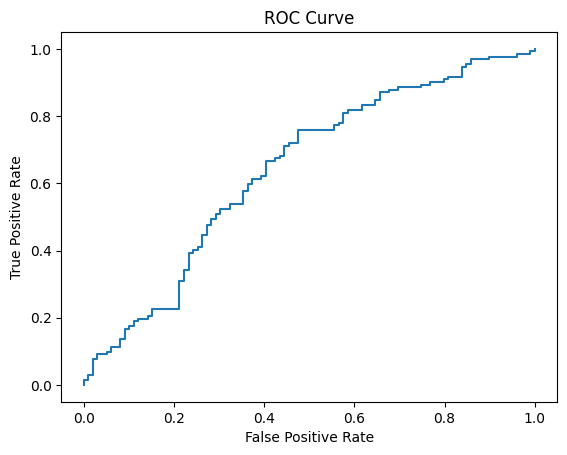

In [44]:
fpr22, tpr22, thresholds22 = roc_curve(y_test22, pred22_proba[:, 1])
plt.plot(fpr22, tpr22)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Text(0.5, 1.0, 'Train Precision-Recall curve')

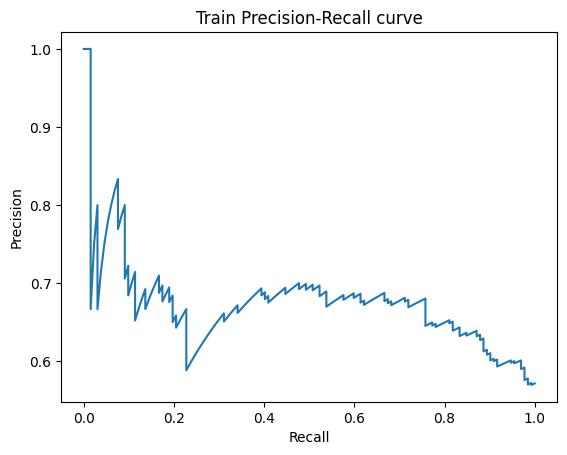

In [45]:
precision22, recall22, thresholdspr22 = precision_recall_curve(y_test22, pred22_proba[:, 1])
plt.plot(recall22, precision22)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve")

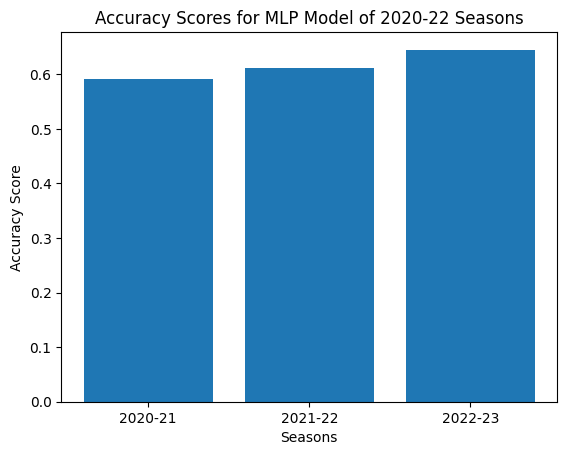

In [46]:
plt.bar(["2020-21", "2021-22", "2022-23"], [accuracy_20, accuracy_21, accuracy_22])
plt.title('Accuracy Scores for MLP Model of 2020-22 Seasons')
plt.xlabel('Seasons')
plt.ylabel('Accuracy Score')
plt.show()

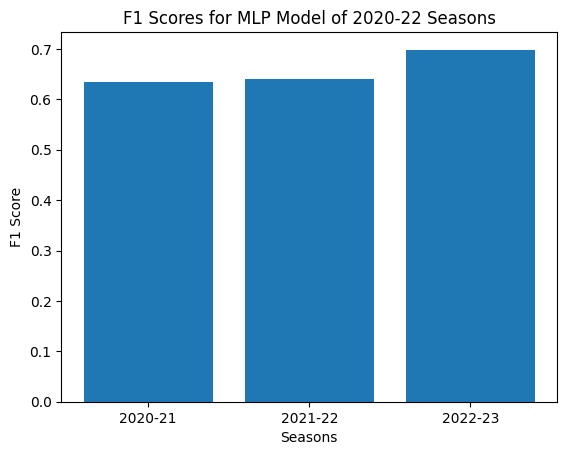

In [47]:
plt.bar(["2020-21", "2021-22", "2022-23"], [f1_20, f1_21, f1_22])
plt.title('F1 Scores for MLP Model of 2020-22 Seasons')
plt.xlabel('Seasons')
plt.ylabel('F1 Score')
plt.show()